## Simulation und Modellierung WS16/17 - Uebung 05

### Aufgabe 1 : verallgemeinerte Fibonacci Zahlen

Schreiben Sie eine Funktion `AllgFib(F0=1,F1=1,a=1,b=1,N=3)`, welche die ersten `N` Folgeglieder der verallgemeinerten Fibonaccifolge

$$
    F_{n+1} = a F_n + b F_{n-1}
$$

mit den Anfangsbedingungen $F_0=$ `F0` und $F_1=$ `F1` berechnet und als Liste ausgibt. (Achtung : Die Definition in der Vorlesung war etwas anders)

Schreiben Sie eine Funktion `my_sqrt(x)`, welche mit Hilfe der verallgemeinerten Fibonacci Zahlen die Wurzel aus `x` bis auf Maschinengenauigkeit ausrechnet. Berechnen Sie $\sqrt{2}$ mit dieser Funktion. 

*Hinweis :* Iterieren Sie die Fibonacci Folge schrittweise bis sich das Verhaeltnis aufeinanderfolgender Zahlen nicht mehr aendert.

In [1]:
def allgFib(F0=1,F1=1,a=1,b=1,N=3):  # definiere eine Funktion 'allgFib' mit den gegebenen Parametern
    Fn=[]                            # erstelle eine leere Liste 'Fn'
    Fn.append(F0)                    # füge der Liste 'Fn' das Element 'F0' hinzu
    Fn.append(F1)                    # füge der Liste 'Fn' das Element 'F1' hinzu
    for n in range (3,N+1):          # die darunterstehende Anweisung wird n-mal im Bereich von bis 'N' durchgeführt 
        Fn.append(a*Fn[-1]+b*Fn[-2]) # Formel zur Berechnung der Fibonacci Folge, die Ergebnisse werden der Liste 'Fn' hinzugefügt 
    return Fn                        # gebe die Liste 'Fn' als Ergebnis der Funktion aus falls sie aufgerufen wird  

In [2]:
print(allgFib(N=100))        # gibt eine Liste mit den ersten 100 Folgegliedern der Fibonaacci Folge aus 

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 679891637638612258, 110008777836

In [6]:
def my_sqrt(x):                           # definiere eine Funktion 'my_sqrt' mit dem Argument 'x'
    mg = 1*10**(-16)                      # setzt die Maschinengenauigkeit auf den Wert 1*10**(-16)
    n=3                                   # setzt 'n' auf 3, da sonst nicht genügend Elemente für die Differen vorhanden ist
    diff = (allgFib(b=x-1,N=n)[-1]/allgFib(b=x-1,N=n)[-2])-(allgFib(b=x-1,N=n)[-2]/allgFib(b=x-1,N=n)[-3]) # berechne die Diffenenz der letzten und vorletzten Fibonaccizahl  
    while abs(diff)>mg:                   # wiederhole die Schleife, bis der Betrag der Variable 'diff' kleiner der Maschinengenauigkeit ist. Sonst berechne die Wurzel.
        n=n+1                             # weise der Variable 'n' den Ausdruck n + 1 zu
        diff=(allgFib(b=x-1,N=n)[-1]/allgFib(b=x-1,N=n)[-2])-(allgFib(b=x-1,N=n)[-2]/allgFib(b=x-1,N=n)[-3]) # Variable 'diff' wird mit neuer Variable n=n+1 neu berechnet
    root=(allgFib(a=2,b=x-1,N=n)[-1]/allgFib(a=2,b=x-1,N=n)[-2])-1 # Berechnung der Wurzel
    return root                           # gebe root als Ergebnis der Funktion aus  

In [7]:
my_sqrt(2)                                # berechne Wurzel 2

1.414213562373095

### Aufgabe 2 : Collatz-Problem

Wir betrachten die folgende Abbildung ueber den *positiven* natuerlichen Zahlen

$$
    f(n) = \left\lbrace \begin{array}{ll}
                            {}n/2 \qquad &,\textrm{falls }n\textrm{ gerade} \\
                            3n+1\qquad &,\textrm{falls }n\textrm{ ungerade}
                        \end{array}
           \right.
$$

sowie die natuerliche Zahl $\tau(n)$ welche angibt, wie of $f$ iteriert werden muss, bis man die Zahl 1 erreicht, d.h.

$$
    \left(f\circ\right)^{\tau(n)}(n) = 1
$$

Schreiben Sie eine Funktion `tau(n)`, welche diese Zahl berechnet. Berechnen Sie eine Liste `L` der Werte $\tau(n)$ fuer die ersten `2**20` positiven natuerlichen Zahlen und plotten diese mit

```python
    from pylab import *
    plot(L,'.') # nur Punkte setzen, ohne diese zu verbinden
    show()
```

<a href="https://en.wikipedia.org/wiki/Collatz_conjecture">Collatz-Problem @ Wikipedia</a><br>
Collatz-Problem @ xkcd : <img src="http://imgs.xkcd.com/comics/collatz_conjecture.png">

In [8]:
def tau(n):                             # definiere eine Funktion 'tau' mit dem Argument 'x'
    L=[]                                # erstelt eine leere Liste 'L'
    while n>1:                          # führe den darunterstehenden Anweisungsblock solange aus wie 'n' größer als 1 ist 
        if n%2==0:                      # wenn 'n' restlos durch 2 teilbar ist, also gerade, führe folgenden Anweisungsblock aus  
            n = n/2                     # teile 'n' durch 2 und definiere es als neues 'n'
            L.append(n)                 # füge das durch neue 'n' der Liste 'L' hinzu 
        else:                           # ist 'n' nicht gerade führe den folgenden Anweisungsblock aus
            n=3*n+1                     # multipliziere 'n' mit 3 und addiere 1 und definiere es als neues 'n' 
            L.append(n)                 # füge das neue 'n' der Liste hinzu
    tau = len(L)                        # bestimme die Länge der Liste 'L' und setzte es tau
    return tau                          # gebe 'tau' als Ergebnis der Funktion aus 

In [10]:
from pylab import *                     # importiert alle Module die in pylab enthalten sind in den mainspace und workspace

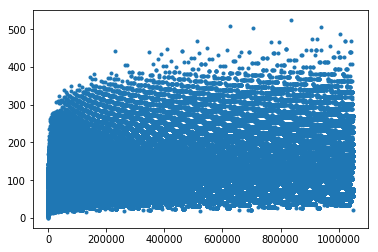

In [11]:
L = [tau(n) for n in range(1,2**20+1)]  # erstelle eine Liste 'L' mit den Werten von 'tau' und dem Argument 'n' von 1 bis 2^20 
plot(L,'.')                             # plote die Liste 'L' als Darstellung von Punkten
show()                                  # zeige das geplotete an 

### Zusatzaufgabe (+10%):

- Wie lautet die Taylorentwicklung von $f(x) = \sqrt{1+x}$ ?
- Schreiben Sie eine Funktion `sqrt1px(x,eps=0)`, welche die Taylorreihe bis auf eine gegebene Genauigkeit $\varepsilon$, bzw. bis zur Konvergenz $\varepsilon=0$ berechnet.
- berechnen Sie $\sqrt{2}$ als `sqrt1px(1.0)` bzw. `1.0/sqrt1px(-0.5)`.